##Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import kagglehub
import seaborn as sns

In [ ]:
!pip3 install pycountry

In [ ]:
# Download latest version
path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'hotel-booking-demand' dataset.
Path to dataset files: /kaggle/input/hotel-booking-demand


In [ ]:
# Path folder hasil download via kagglehub
print("Path:", path)

# Cek isi folder
print(os.listdir(path))

# Load CSV ke DataFrame
df = pd.read_csv(os.path.join(path, "hotel_bookings.csv"))


Path: /kaggle/input/hotel-booking-demand
['hotel_bookings.csv']


## Data Understanding


In [ ]:
# Display all columns without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', None)

# Combine first 5 rows and last 5 rows
df_preview = pd.concat([df.head(5), df.tail(5)], ignore_index=True)

# Optional: add a column to indicate whether the row is from the head or tail
df_preview['row_type'] = ['head']*5 + ['tail']*5

# Display the preview
df_preview



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,row_type
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,head
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,head
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,head
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,head
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,head
5,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,tail
6,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,tail
7,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,tail
8,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,tail
9,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07,tail


In [ ]:
#Basic Dataset Info
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

Dataset Shape: (119390, 32)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# Check if a column contains any negative values (numeric only)
def has_negative(col):
    return (col < 0).any() if pd.api.types.is_numeric_dtype(col) else False

# Calculate percentage of missing values
def percent_missing(col):
    return col.isnull().mean() * 100

# Check if column has the same value for all rows
def is_constant(col):
    return col.nunique() == 1

# Get the most common (mode) value in the column
def most_common(col):
    return col.mode().iloc[0] if not col.mode().empty else None

# Return a small sample of unique non-null values (up to 5)
def sample_values(col):
    return col.dropna().unique()[:5]

# Detect outliers in numeric columns using IQR
def has_outliers(col):
    if pd.api.types.is_numeric_dtype(col):
        q1 = col.quantile(0.25)
        q3 = col.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        return ((col < lower_bound) | (col > upper_bound)).any()
    return False

# Check if a column has duplicated values
def has_duplicates(col):
    return col.duplicated().any()

# Count total duplicated rows in the dataset
duplicate_count = df.duplicated().sum()
print(f"Number of duplicated rows: {duplicate_count}\n")

# Create summary DataFrame
column_summary = pd.DataFrame({
    "Feature": df.columns,
    "Data Type": df.dtypes,
    "Missing %": df.apply(percent_missing),
    "Unique Count": df.nunique(),
    "Contains Negative Values": df.apply(has_negative),
    "Has Outliers (IQR)": df.apply(has_outliers),
    "Is Constant": df.apply(is_constant),
    "Has Duplicates": df.apply(has_duplicates),
    "Most Common Value": df.apply(most_common),
    "Sample Unique Values": df.apply(sample_values)
}).reset_index(drop=True)

# Optional: Sort summary by unique count descending
column_summary = column_summary.sort_values(by="Unique Count", ascending=False)

# Display the final summary
column_summary


Number of duplicated rows: 31994



,Feature,Data Type,Missing %,Unique Count,Contains Negative Values,Has Outliers (IQR),Is Constant,Has Duplicates,Most Common Value,Sample Unique Values
27,adr,float64,0.000000,8879,True,True,False,True,62.0,"[0.0, 75.0, 98.0, 107.0, 103.0]"
31,reservation_status_date,object,0.000000,926,False,False,False,True,2015-10-21,"[2015-07-01, 2015-07-02, 2015-07-03, 2015-05-06, 2015-04-22]"
2,lead_time,int64,0.000000,479,False,True,False,True,0,"[342, 737, 7, 13, 14]"
24,company,float64,94.306893,352,False,False,False,True,40.0,"[110.0, 113.0, 270.0, 178.0, 240.0]"
23,agent,float64,13.686238,333,False,False,False,True,9.0,"[304.0, 240.0, 303.0, 15.0, 241.0]"
13,country,object,0.408744,177,False,False,False,True,PRT,"[PRT, GBR, USA, ESP, IRL]"
25,days_in_waiting_list,int64,0.000000,128,False,True,False,True,0,"[0, 50, 47, 65, 122]"
18,previous_bookings_not_canceled,int64,0.000000,73,False,True,False,True,0,"[0, 1, 2, 3, 4]"
5,arrival_date_week_number,int64,0.000000,53,False,False,False,True,33,"[27, 28, 29, 30, 31]"
8,stays_in_week_nights,int64,0.000000,35,False,True,False,True,2,"[0, 1, 2, 3, 4]"


## Missing Values & Dropping Column



After inspecting the dataset, we identified four columns with missing values:

1. **`company`** (~94% missing)  
   - Most bookings do not have company information.  
   - Since the missing rate is very high, we fill missing values with `0` to indicate "no company" rather than dropping the rows.


2. **`agent`** (~13.7% missing)  
   - Some bookings are direct and do not have an assigned agent.  
   - Missing values are filled with `0` to indicate "no agent assigned."

3. **`country`** (~0.4% missing)  
   - Very few bookings are missing the guest country.  
   - We fill these missing values with `'Unknown'` to preserve the row while marking the missing information.

4. **`children`** (4 rows missing)  
   - Only a handful of bookings are missing the number of children.  
   - We fill these missing values with `0`, assuming no children were registered for those bookings.

In [ ]:
# Quick summary of missing values
missing_summary = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing %': df.isnull().mean() * 100
})

# Only show columns with missing values
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]

# Sort by missing percentage descending
missing_summary = missing_summary.sort_values(by='Missing %', ascending=False)

missing_summary


,Missing Count,Missing %
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350


**Handling Missing Values**

In [ ]:
# Drop 'company' since ~94% missing
df = df.drop(columns=["company"])

# Fill missing agent with 0 (no agent)
df["agent"] = df["agent"].fillna(0)

#Recast agent from float to int
df["agent"] = df["agent"].astype(int)

# Fill missing country with "Unknown"
df["country"] = df["country"].fillna("Unknown")

# Fill missing children with 0
df["children"] = df["children"].fillna(df['children'].mode()[0])

# Verify no missing values remain
print(df.isnull().sum())


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

## Duplicates


In [ ]:
len(df)

119390

In [ ]:
df.duplicated().sum()

np.int64(32001)

In [ ]:
df[df.duplicated(keep=False)]




,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,98.00,0,1,Check-Out,2015-07-03
21,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250,0,Transient,84.67,0,1,Check-Out,2015-07-07
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250,0,Transient,84.67,0,1,Check-Out,2015-07-07
39,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250,0,Transient,137.00,0,1,Check-Out,2015-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119372,City Hotel,0,175,2017,August,35,31,1,3,1,0.0,0,BB,NLD,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,42,0,Transient,82.35,0,1,Check-Out,2017-09-04


**Dropping Duplicates**

In [ ]:
df.drop_duplicates(inplace = True)

**New Number of Entries**

In [ ]:
len(df)

87389

In [ ]:
#counting booking that got canceled but have arrival date
 #(
 #   df['is_canceled'].eq(1) &
 #   pd.to_datetime(
 #       df['arrival_date_year'].astype(str)+'-'+df['arrival_date_month'].astype(str)+'-'+df['arrival_date_day_of_month'].astype(str),
 #       format='%Y-%B-%d', errors='coerce'
 #   ).notna()
#).sum()


In [ ]:
#total_cancel = df['is_canceled'].sum()
#print(total_cancel)

# Outliers

In [ ]:
# Function to detect outliers using IQR
def detect_outliers(col):
    if pd.api.types.is_numeric_dtype(col):  # Only numeric columns
        Q1 = col.quantile(0.25)
        Q3 = col.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return ((col < lower_bound) | (col > upper_bound)).sum()  # count of outliers
    return None

# Apply function to all columns
outlier_summary = pd.DataFrame({
    "Column": df.columns,
    "Outlier Count": df.apply(detect_outliers),
    "Total Rows": len(df)
})

# Calculate % of outliers
outlier_summary["Outlier %"] = (outlier_summary["Outlier Count"] / outlier_summary["Total Rows"]) * 100

# Drop non-numeric rows (where function returned None)
outlier_summary = outlier_summary.dropna().reset_index(drop=True)

print(outlier_summary)


                            Column  Outlier Count  Total Rows  Outlier %
0                      is_canceled            0.0       87389   0.000000
1                        lead_time         2396.0       87389   2.741764
2                arrival_date_year            0.0       87389   0.000000
3         arrival_date_week_number            0.0       87389   0.000000
4        arrival_date_day_of_month            0.0       87389   0.000000
5          stays_in_weekend_nights          220.0       87389   0.251748
6             stays_in_week_nights         1531.0       87389   1.751937
7                           adults        22894.0       87389  26.197805
8                         children         8364.0       87389   9.570999
9                           babies          914.0       87389   1.045898
10               is_repeated_guest         3415.0       87389   3.907814
11          previous_cancellations         1685.0       87389   1.928160
12  previous_bookings_not_canceled         3545.0  

# Feature Engineering

In [ ]:
#Bikin column baru untuk gabungin arrival date, month, year
# Combine arrival year, month, and day into a single datetime column
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'].astype(str) + '-' +
    df['arrival_date_day_of_month'].astype(str),
    format='%Y-%B-%d'  # %B is full month name
)

# Check the new column
df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date']].head()

,arrival_date_year,arrival_date_month,arrival_date_day_of_month,arrival_date
0,2015,July,1,2015-07-01
1,2015,July,1,2015-07-01
2,2015,July,1,2015-07-01
3,2015,July,1,2015-07-01
4,2015,July,1,2015-07-01


In [ ]:
#making columns for customer segmentation
def customer_segment(row):
    adults = row['adults']
    children = row['children']
    babies = row['babies']

    if adults == 1 and children == 0 and babies == 0:
        return 'Solo Traveler'
    elif adults == 2 and children == 0 and babies == 0:
        return 'Couple'
    elif adults == 1 and (children > 0 or babies > 0):
        return 'Single Parent'
    elif children > 0 and babies == 0 and adults > 0:
        return 'Family with Children'
    elif babies > 0 and children == 0 and adults > 0:
        return 'Family with Babies'
    elif children > 0 and babies > 0 and adults > 0:
        return 'Family with Children and Babies'
    elif adults >= 3 and children == 0 and babies == 0:
        return 'Group of Adults'
    elif children > 0 and adults == 0 and babies == 0:
        return 'Children Only'
    elif adults >= 2 and (children + babies) >= 2:
        return 'Large Family'
    elif adults >= 3 and (children > 0 or babies > 0):
        return 'Extended Group'
    elif adults == 0 and children == 0 and babies == 0:
        return 'Unknown / Data Error'
    else:
        return 'Others' #Coba cari tahu yang ini, #Children only


# Tambahkan kolom baru
df['customer_segment'] = df.apply(customer_segment, axis=1)

# Cek hasil distribusi segmen
print(df['customer_segment'].value_counts())



customer_segment
Couple                             56580
Solo Traveler                      16063
Family with Children                7552
Group of Adults                     5477
Family with Babies                   729
Single Parent                        435
Children Only                        216
Family with Children and Babies      168
Unknown / Data Error                 166
Others                                 3
Name: count, dtype: int64


/tmp/ipython-input-1269156739.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




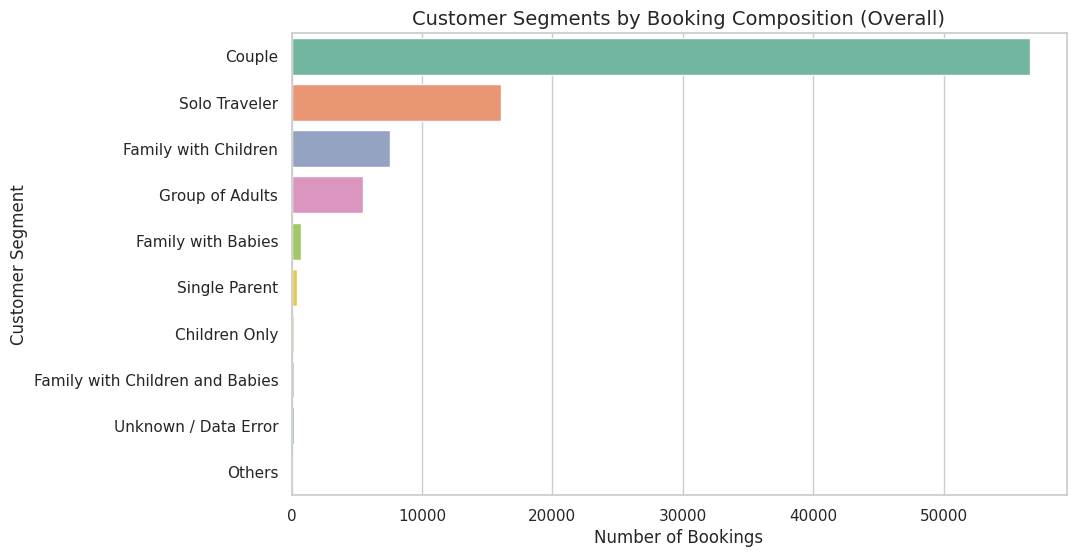

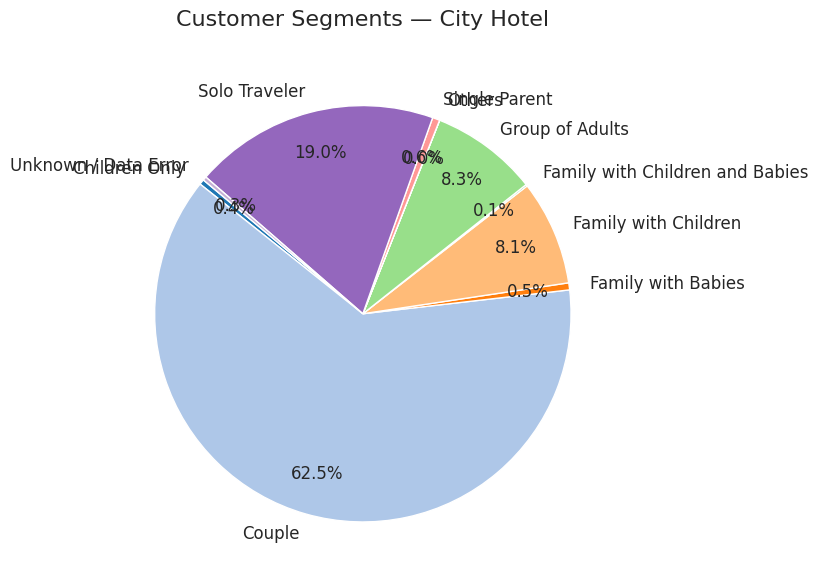

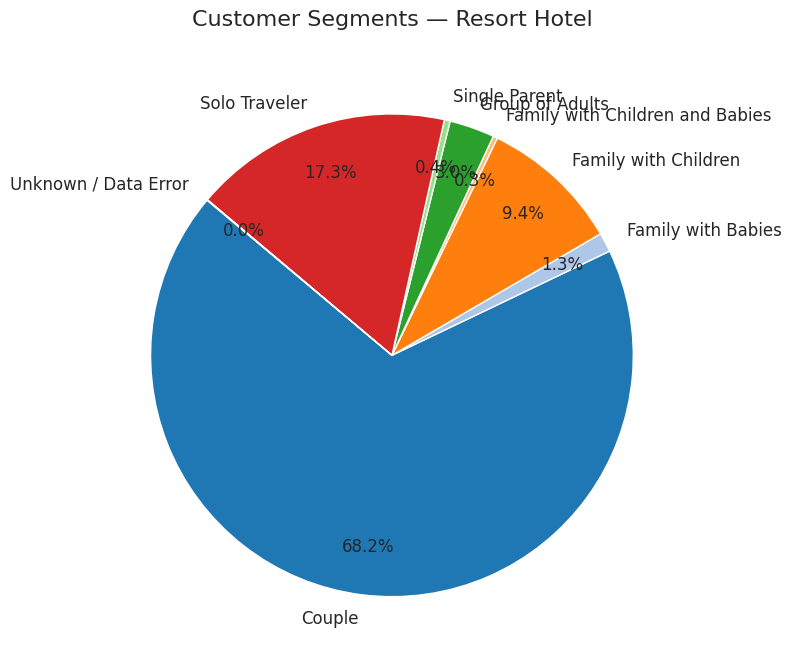

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(
    y='customer_segment',
    data=df,
    order=df['customer_segment'].value_counts().index,
    palette="Set2"
)
plt.title("Customer Segments by Booking Composition (Overall)", fontsize=14)
plt.xlabel("Number of Bookings")
plt.ylabel("Customer Segment")
plt.show()

import matplotlib.pyplot as plt

# Hitung jumlah booking per hotel dan segmen
seg_counts = (
    df.groupby(['hotel','customer_segment'])
      .size()
      .reset_index(name='count')
)

# Loop per hotel untuk pie chart
hotels = seg_counts['hotel'].unique()
for h in hotels:
    data = seg_counts[seg_counts['hotel'] == h]

    plt.figure(figsize=(8,8))  # lebih besar
    wedges, texts, autotexts = plt.pie(
        data['count'],
        labels=data['customer_segment'],
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.tab20.colors,
        textprops={'fontsize': 12},   # perbesar font
        pctdistance=0.8               # geser angka ke luar biar tidak ketutupan
    )

    # Tambahkan judul
    plt.title(f"Customer Segments — {h}", fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()



**Export to CSV**

In [ ]:
# Group by hotel and customer segment
seg_counts = (
    df.groupby(['hotel','customer_segment'])
      .size()
      .reset_index(name='count')
)

# Export to CSV
seg_counts.to_csv("customer_segments_by_hotel.csv", index=False)

print("Exported customer_segments_by_hotel.csv")


Exported customer_segments_by_hotel.csv


# Cleaned Dataset

In [ ]:
print("\nDataset shape after cleaning:", df.shape)
print("\nDataset info:")
df.info()



Dataset shape after cleaning: (87389, 33)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 87389 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87389 non-null  object        
 1   is_canceled                     87389 non-null  int64         
 2   lead_time                       87389 non-null  int64         
 3   arrival_date_year               87389 non-null  int64         
 4   arrival_date_month              87389 non-null  object        
 5   arrival_date_week_number        87389 non-null  int64         
 6   arrival_date_day_of_month       87389 non-null  int64         
 7   stays_in_weekend_nights         87389 non-null  int64         
 8   stays_in_week_nights            87389 non-null  int64         
 9   adults                          87389 non-null  int64         
 10  children        

In [ ]:
# Check if a column contains any negative values (numeric only)
def has_negative(col):
    return (col < 0).any() if pd.api.types.is_numeric_dtype(col) else False

# Calculate percentage of missing values
def percent_missing(col):
    return col.isnull().mean() * 100

# Check if column has the same value for all rows
def is_constant(col):
    return col.nunique() == 1

# Get the most common (mode) value in the column
def most_common(col):
    return col.mode().iloc[0] if not col.mode().empty else None

# Return a small sample of unique non-null values (up to 5)
def sample_values(col):
    return col.dropna().unique()[:5]

# Detect outliers in numeric columns using IQR
def has_outliers(col):
    if pd.api.types.is_numeric_dtype(col):
        q1 = col.quantile(0.25)
        q3 = col.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        return ((col < lower_bound) | (col > upper_bound)).any()
    return False

# Check if a column has duplicated values
def has_duplicates(col):
    return col.duplicated().any()

# Count total duplicated rows in the dataset
duplicate_count = df.duplicated().sum()
print(f"Number of duplicated rows: {duplicate_count}\n")

# Create summary DataFrame
column_summary = pd.DataFrame({
    "Feature": df.columns,
    "Data Type": df.dtypes,
    "Missing %": df.apply(percent_missing),
    "Unique Count": df.nunique(),
    "Contains Negative Values": df.apply(has_negative),
    "Has Outliers (IQR)": df.apply(has_outliers),
    "Is Constant": df.apply(is_constant),
    "Has Duplicates": df.apply(has_duplicates),
    "Most Common Value": df.apply(most_common),
    "Sample Unique Values": df.apply(sample_values)
}).reset_index(drop=True)

# Optional: Sort summary by unique count descending
column_summary = column_summary.sort_values(by="Unique Count", ascending=False)

# Display the final summary
column_summary


Number of duplicated rows: 0



,Feature,Data Type,Missing %,Unique Count,Contains Negative Values,Has Outliers (IQR),Is Constant,Has Duplicates,Most Common Value,Sample Unique Values
26,adr,float64,0.0,8879,True,True,False,True,0.0,"[0.0, 75.0, 98.0, 107.0, 103.0]"
30,reservation_status_date,object,0.0,926,False,False,False,True,2016-02-14,"[2015-07-01, 2015-07-02, 2015-07-03, 2015-05-06, 2015-04-22]"
31,arrival_date,datetime64[ns],0.0,793,False,False,False,True,2017-04-29 00:00:00,"[2015-07-01 00:00:00, 2015-07-02 00:00:00, 2015-07-03 00:00:00, 2015-07-04 00:00:00, 2015-07-05 00:00:00]"
2,lead_time,int64,0.0,479,False,True,False,True,0,"[342, 737, 7, 13, 14]"
23,agent,int64,0.0,334,False,False,False,True,9,"[0, 304, 240, 303, 15]"
13,country,object,0.0,178,False,False,False,True,PRT,"[PRT, GBR, USA, ESP, IRL]"
24,days_in_waiting_list,int64,0.0,128,False,True,False,True,0,"[0, 50, 47, 65, 122]"
18,previous_bookings_not_canceled,int64,0.0,73,False,True,False,True,0,"[0, 1, 2, 3, 4]"
5,arrival_date_week_number,int64,0.0,53,False,False,False,True,33,"[27, 28, 29, 30, 31]"
8,stays_in_week_nights,int64,0.0,35,False,True,False,True,1,"[0, 1, 2, 3, 4]"


In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,customer_segment
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,Couple
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,Couple
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,Solo Traveler
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,Solo Traveler
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,Couple


**Export to Google Sheet**

In [ ]:
import pandas as pd
import pycountry
from google.colab import files

# --- Step 1: Convert country codes ---
def iso_to_country(alpha3):
    try:
        return pycountry.countries.get(alpha_3=alpha3).name
    except:
        return alpha3

def iso_to_alpha2(alpha3):
    try:
        return pycountry.countries.get(alpha_3=alpha3).alpha_2
    except:
        return alpha3

# Add new columns for Looker compatibility
df['country_full'] = df['country'].apply(iso_to_country)
df['country_alpha2'] = df['country'].apply(iso_to_alpha2)

# --- Step 2: Save full cleaned dataset ---
df.to_csv("hotel_bookings_cleaned.csv", index=False)

# --- Step 3: Create summarized country visitors dataset ---
country_visitors = (
    df[df['is_canceled'] == 0]
    .groupby('country')
    .size()
    .reset_index(name='count')
)

country_visitors['country_full'] = country_visitors['country'].apply(iso_to_country)
country_visitors['country_alpha2'] = country_visitors['country'].apply(iso_to_alpha2)

# Save full list
country_visitors.to_csv("country_visitors.csv", index=False)

# Save top 10 list
top10_countries = country_visitors.sort_values(by='count', ascending=False).head(10)
top10_countries.to_csv("top10_countries.csv", index=False)

# --- Step 4: Download the files ---

print("- hotel_bookings_cleaned.csv (full dataset)")
print("- country_visitors.csv (all countries)")

files.download("hotel_bookings_cleaned.csv")
files.download("country_visitors.csv")


- hotel_bookings_cleaned.csv (full dataset)
- country_visitors.csv (all countries)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Export Top 10 Countries**

In [ ]:
print("top10_countries.csv (top 10 countries)")
files.download("top10_countries.csv")


top10_countries.csv (top 10 countries)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Exploratory Data Analysis



## Booking Details
**Columns:** `hotel`, `is_canceled`, `lead_time`, `arrival_date_year`,
`arrival_date_month`, `arrival_date_week_number`, `arrival_date_day_of_month`

- **Purpose of Analysis:**
  - Examine the distribution of bookings between City Hotel and Resort Hotel.
  - Calculate cancellation rates per hotel type.
  - Analyze lead time (days between booking and arrival).
  - Identify seasonal patterns by year, month, and week.

Distribution of bookings between City and Resort

hotel
City Hotel      53426
Resort Hotel    33963
Name: count, dtype: int64


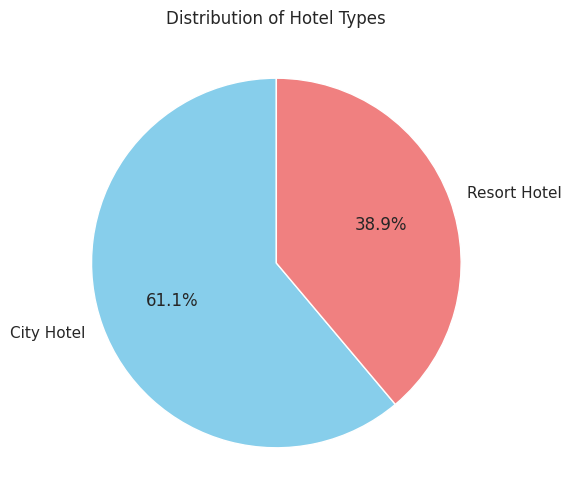

In [ ]:
# Set seaborn style
sns.set(style="whitegrid")

# Count hotel types
hotel_counts = df['hotel'].value_counts()

# Print counts
print(hotel_counts)

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(hotel_counts, labels=hotel_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue','lightcoral'])
plt.title("Distribution of Hotel Types")
plt.show()

Cancelations Rate

Cancellation Counts:
 is_canceled
0    63364
1    24025
Name: count, dtype: int64


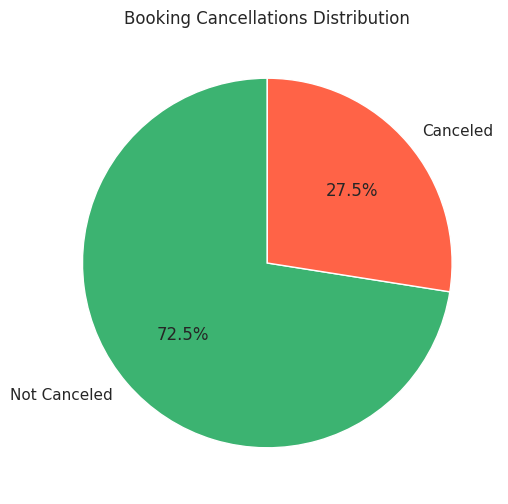

In [ ]:
# Count cancellations
cancel_counts = df['is_canceled'].value_counts()

# Print counts
print("Cancellation Counts:\n", cancel_counts)

# Pie chart for cancellations (different colors)
plt.figure(figsize=(6,6))
plt.pie(
    cancel_counts,
    labels=['Not Canceled', 'Canceled'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['mediumseagreen', 'tomato']  # new colors
)
plt.title("Booking Cancellations Distribution")
plt.show()

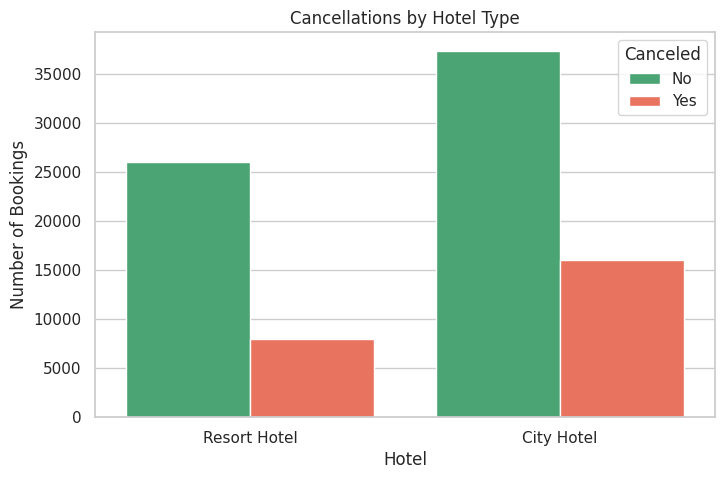

In [ ]:
# Define palette for cancellations
hotel_palette = {0: 'mediumseagreen', 1: 'tomato'}

# Hotel type vs cancellations
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='hotel', hue='is_canceled', palette=hotel_palette)
plt.title('Cancellations by Hotel Type')
plt.xlabel('Hotel')
plt.ylabel('Number of Bookings')
plt.legend(title='Canceled', labels=['No', 'Yes'])
plt.show()


Monthly Booking

Bookings per Month:
 arrival_date
Jan     4693
Feb     6097
Mar     7513
Apr     7908
May     8354
Jun     7765
Jul    10056
Aug    11257
Sep     6689
Oct     6934
Nov     4993
Dec     5130
Name: count, dtype: int64


/tmp/ipython-input-1831552192.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




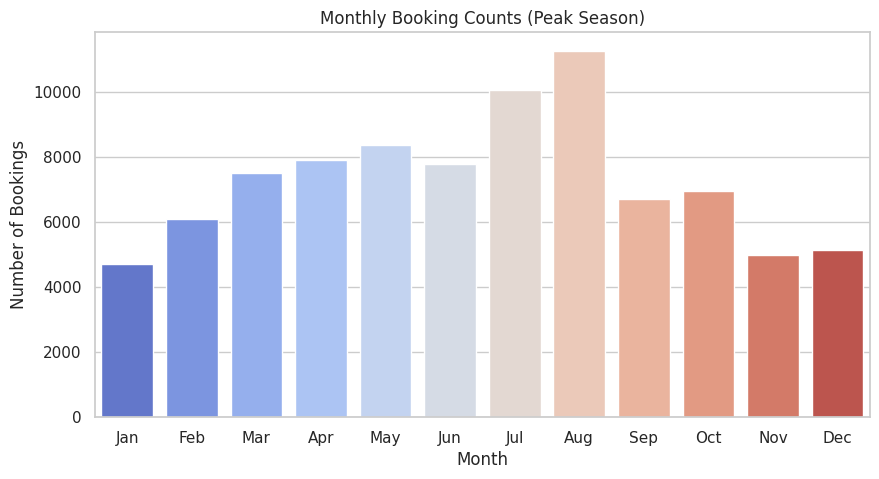

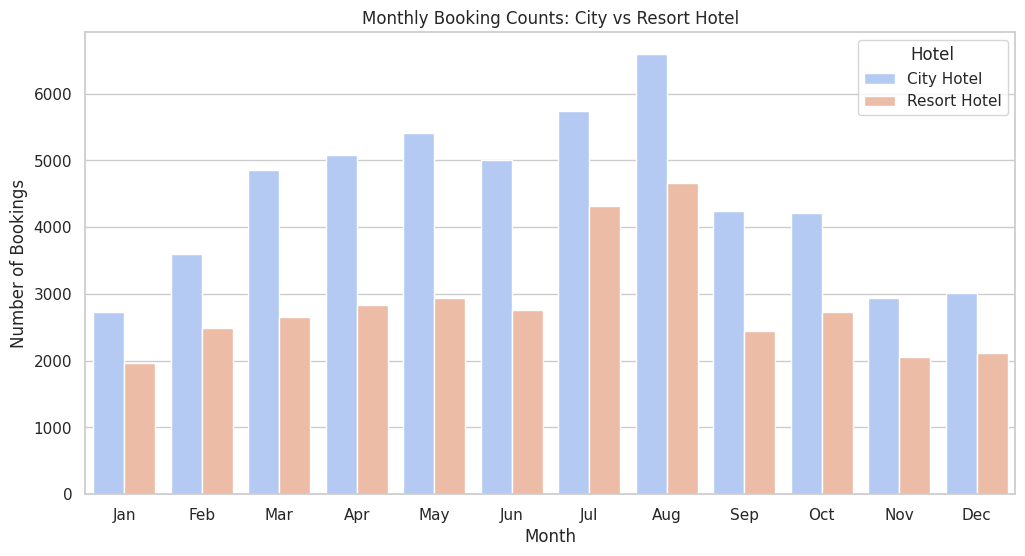

In [ ]:
# Count bookings per month
monthly_bookings = df['arrival_date'].dt.month.value_counts().sort_index()

# Map month numbers to names
month_names = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
               7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

monthly_bookings.index = monthly_bookings.index.map(month_names)

# Print the counts
print("Bookings per Month:\n", monthly_bookings)

# Plot bookings per month
plt.figure(figsize=(10,5))
sns.barplot(x=monthly_bookings.index, y=monthly_bookings.values, palette='coolwarm')
plt.title("Monthly Booking Counts (Peak Season)")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.show()

# Extract month number from arrival_date
df['month_num'] = df['arrival_date'].dt.month

# Group by hotel and month
monthly_bookings_by_hotel = (
    df.groupby(['hotel','month_num'])
      .size()
      .reset_index(name='count')
)

# Map month numbers to names
month_names = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
               7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
monthly_bookings_by_hotel['month'] = monthly_bookings_by_hotel['month_num'].map(month_names)

# Plot grouped bar chart
plt.figure(figsize=(12,6))
sns.barplot(
    x='month', y='count', hue='hotel',
    data=monthly_bookings_by_hotel, palette='coolwarm'
)

plt.title("Monthly Booking Counts: City vs Resort Hotel")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.legend(title='Hotel')
plt.show()

/tmp/ipython-input-1402018556.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




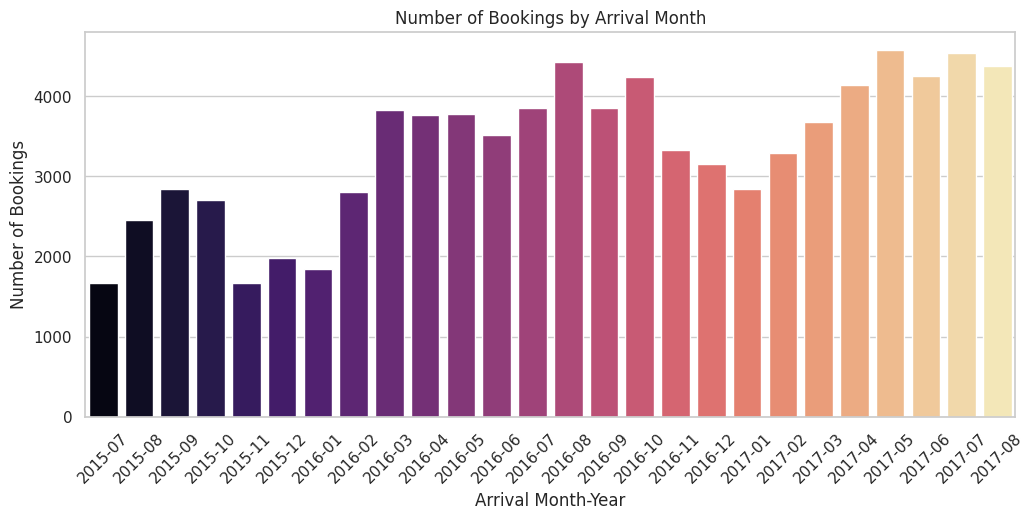

In [ ]:
# Ensure arrival_date is datetime
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df['month_year'] = df['arrival_date'].dt.to_period('M')

# Group by month_year
monthly_bookings = df.groupby('month_year').size().reset_index(name='count')

# Create a color palette
palette = sns.color_palette("magma", len(monthly_bookings))

# Plot
plt.figure(figsize=(12,5))
sns.barplot(data=monthly_bookings, x='month_year', y='count', palette=palette)
plt.title('Number of Bookings by Arrival Month')
plt.xlabel('Arrival Month-Year')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

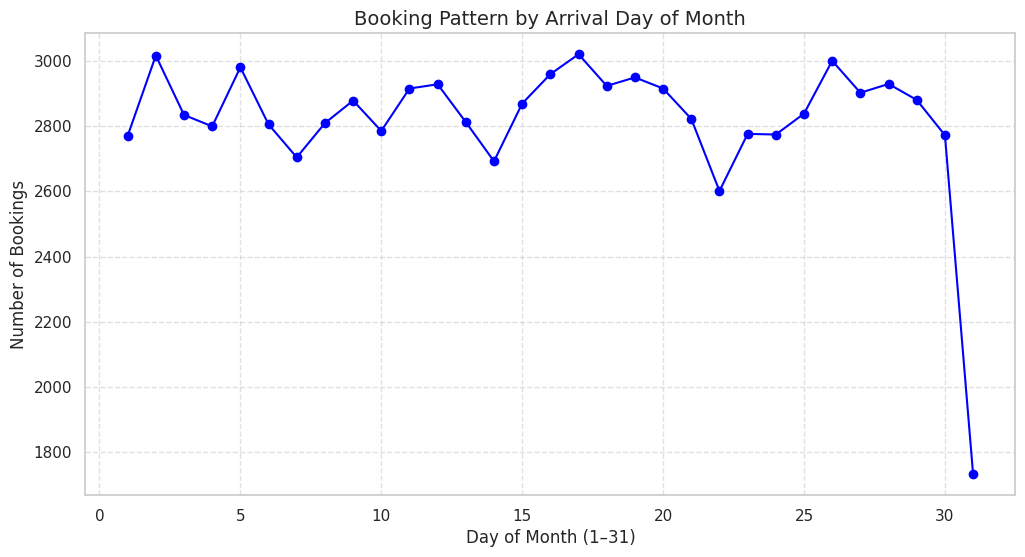

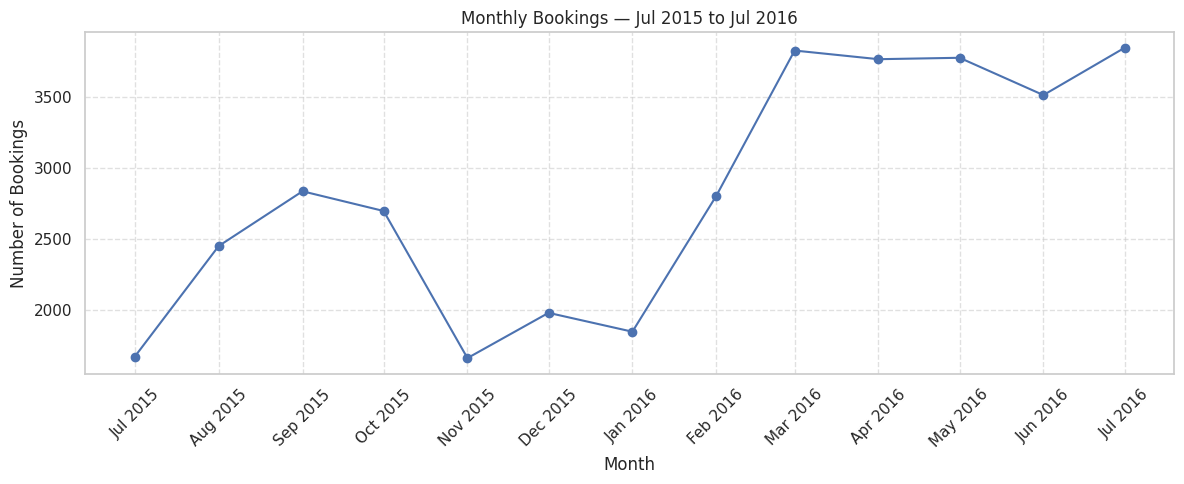

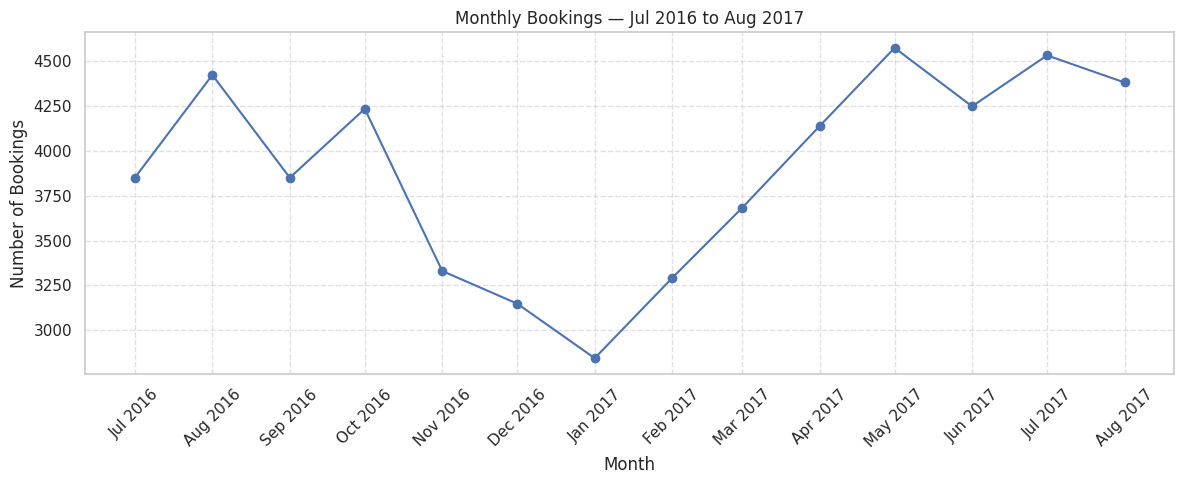

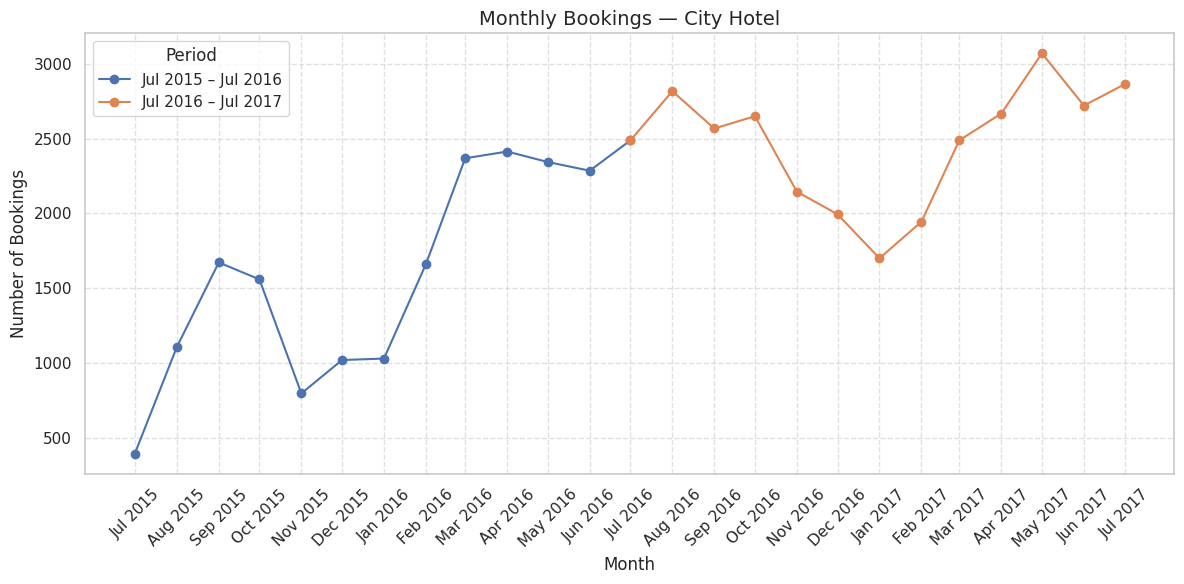

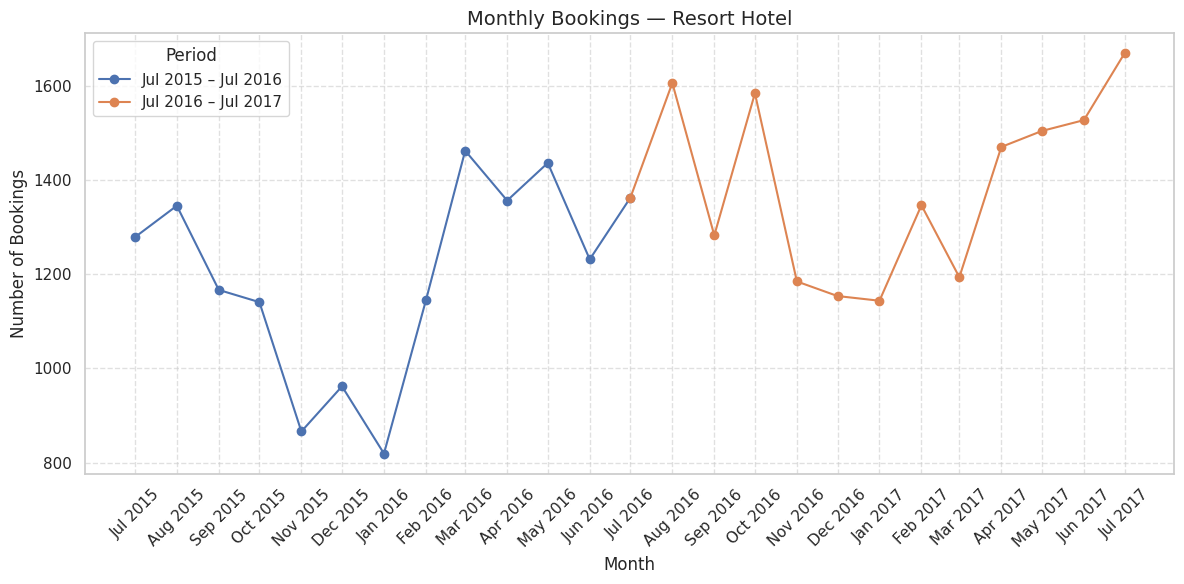

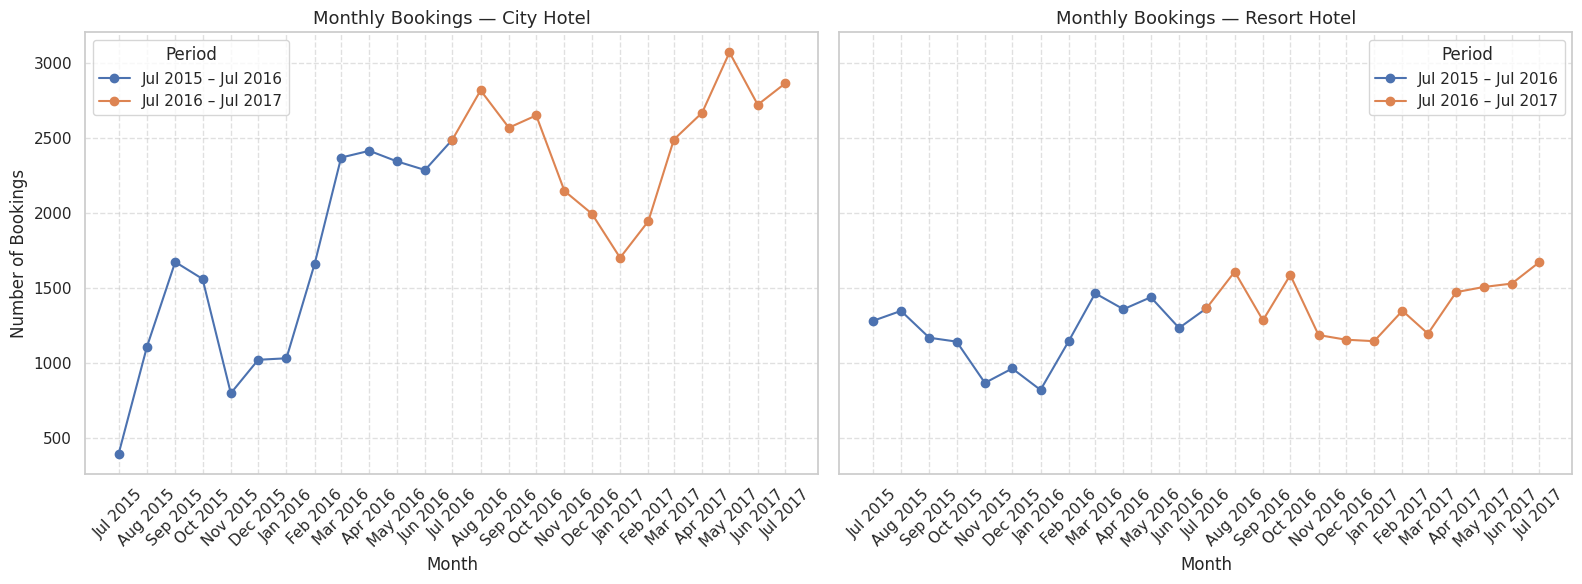

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah booking per tanggal kedatangan (1–31)
arrival_counts = df['arrival_date_day_of_month'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.plot(arrival_counts.index, arrival_counts.values, marker='o', linestyle='-', color='blue')

plt.title('Booking Pattern by Arrival Day of Month', fontsize=14)
plt.xlabel('Day of Month (1–31)', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

# pastikan arrival_date sudah datetime
if not pd.api.types.is_datetime64_any_dtype(df['arrival_date']):
    df['arrival_date'] = pd.to_datetime(df['arrival_date'], errors='coerce')

# helper function: hitung jumlah booking per bulan
def monthly_counts_in_range(df, start, end):
    mask = (df['arrival_date'] >= pd.Timestamp(start)) & (df['arrival_date'] <= pd.Timestamp(end))
    d = (
        df.loc[mask, 'arrival_date']
          .dt.to_period('M')       # ambil periode bulanan
          .value_counts()
          .rename_axis('month')
          .to_frame('count')
          .sort_index()
    )
    # pastikan seluruh bulan muncul walau count = 0
    full_idx = pd.period_range(start=start, end=end, freq='M')
    d = d.reindex(full_idx, fill_value=0)
    d.index = d.index.to_timestamp()  # supaya bisa dipakai di matplotlib
    return d

# periode 1: Jul 2015 – Jul 2016
m1 = monthly_counts_in_range(df, '2015-07-01', '2016-07-31')
plt.figure(figsize=(12,5))
plt.plot(m1.index, m1['count'], marker='o', linestyle='-')
plt.title('Monthly Bookings — Jul 2015 to Jul 2016')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(m1.index, m1.index.strftime('%b %Y'), rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# periode 2: Jul 2016 – Jul 2017
m2 = monthly_counts_in_range(df, '2016-07-01', '2017-08-31')
plt.figure(figsize=(12,5))
plt.plot(m2.index, m2['count'], marker='o', linestyle='-')
plt.title('Monthly Bookings — Jul 2016 to Aug 2017')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(m2.index, m2.index.strftime('%b %Y'), rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# City Hotel
city_df = df[df['hotel'] == 'City Hotel']

m1_city = monthly_counts_in_range(city_df, '2015-07-01', '2016-07-31')
m2_city = monthly_counts_in_range(city_df, '2016-07-01', '2017-07-31')

ticks_city = m1_city.index.union(m2_city.index)

plt.figure(figsize=(12,6))
plt.plot(m1_city.index, m1_city['count'], marker='o', linestyle='-', label='Jul 2015 – Jul 2016')
plt.plot(m2_city.index, m2_city['count'], marker='o', linestyle='-', label='Jul 2016 – Jul 2017')

plt.title('Monthly Bookings — City Hotel', fontsize=14)
plt.xlabel('Month'); plt.ylabel('Number of Bookings')
plt.xticks(ticks_city, [d.strftime('%b %Y') for d in ticks_city], rotation=45)
plt.legend(title='Period')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Resort Hotel
resort_df = df[df['hotel'] == 'Resort Hotel']

m1_resort = monthly_counts_in_range(resort_df, '2015-07-01', '2016-07-31')
m2_resort = monthly_counts_in_range(resort_df, '2016-07-01', '2017-07-31')

ticks_resort = m1_resort.index.union(m2_resort.index)

plt.figure(figsize=(12,6))
plt.plot(m1_resort.index, m1_resort['count'], marker='o', linestyle='-', label='Jul 2015 – Jul 2016')
plt.plot(m2_resort.index, m2_resort['count'], marker='o', linestyle='-', label='Jul 2016 – Jul 2017')

plt.title('Monthly Bookings — Resort Hotel', fontsize=14)
plt.xlabel('Month'); plt.ylabel('Number of Bookings')
plt.xticks(ticks_resort, [d.strftime('%b %Y') for d in ticks_resort], rotation=45)
plt.legend(title='Period')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import pandas as pd

# --- Helper: monthly counts in a date range (works for any filtered df) ---
def monthly_counts_in_range(df_sub, start, end):
    mask = (df_sub['arrival_date'] >= pd.Timestamp(start)) & (df_sub['arrival_date'] <= pd.Timestamp(end))
    d = (
        df_sub.loc[mask, 'arrival_date']
              .dt.to_period('M')
              .value_counts()
              .rename_axis('month')
              .to_frame('count')
              .sort_index()
    )
    full_idx = pd.period_range(start=start, end=end, freq='M')
    d = d.reindex(full_idx, fill_value=0)
    d.index = d.index.to_timestamp()
    return d

# Subset by hotel
city_df   = df[df['hotel'].str.contains('City', case=False, na=False)]
resort_df = df[df['hotel'].str.contains('Resort', case=False, na=False)]

# Periods
m1_city = monthly_counts_in_range(city_df,   '2015-07-01', '2016-07-31')
m2_city = monthly_counts_in_range(city_df,   '2016-07-01', '2017-07-31')

m1_res  = monthly_counts_in_range(resort_df, '2015-07-01', '2016-07-31')
m2_res  = monthly_counts_in_range(resort_df, '2016-07-01', '2017-07-31')

# Union of ticks per subplot
ticks_city = m1_city.index.union(m2_city.index)
ticks_res  = m1_res.index.union(m2_res.index)

# --- Plot: two line charts (City vs Resort) ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# City Hotel
axes[0].plot(m1_city.index, m1_city['count'], marker='o', linestyle='-', label='Jul 2015 – Jul 2016')
axes[0].plot(m2_city.index, m2_city['count'], marker='o', linestyle='-', label='Jul 2016 – Jul 2017')
axes[0].set_title('Monthly Bookings — City Hotel', fontsize=13)
axes[0].set_xlabel('Month'); axes[0].set_ylabel('Number of Bookings')
axes[0].set_xticks(ticks_city); axes[0].set_xticklabels([d.strftime('%b %Y') for d in ticks_city], rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend(title='Period')

# Resort Hotel
axes[1].plot(m1_res.index, m1_res['count'], marker='o', linestyle='-', label='Jul 2015 – Jul 2016')
axes[1].plot(m2_res.index, m2_res['count'], marker='o', linestyle='-', label='Jul 2016 – Jul 2017')
axes[1].set_title('Monthly Bookings — Resort Hotel', fontsize=13)
axes[1].set_xlabel('Month')
axes[1].set_xticks(ticks_res); axes[1].set_xticklabels([d.strftime('%b %Y') for d in ticks_res], rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend(title='Period')

plt.tight_layout()
plt.show()


In [ ]:
!pip3 install pycountry

##  Stay Details
**Columns:** `stays_in_weekend_nights`, `stays_in_week_nights`, `adults`, `children`, `babies`

- **Purpose of Analysis:**
  - Measure the average length of stay (weekdays and weekends).
  - Compare stay duration between City Hotel and Resort Hotel.
  - Analyze guest composition: adults, children, and babies.

In [ ]:
# Calculate average stay duration (week nights + weekend nights) by hotel type
avg_stay_duration = (
    df.groupby('hotel')
      .apply(lambda g: (g['stays_in_week_nights'] + g['stays_in_weekend_nights']).mean())
      .reset_index(name='average_stay_duration')
)

print(avg_stay_duration)


          hotel  average_stay_duration
0    City Hotel               3.146689
1  Resort Hotel               4.392515


/tmp/ipython-input-1607471235.py:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



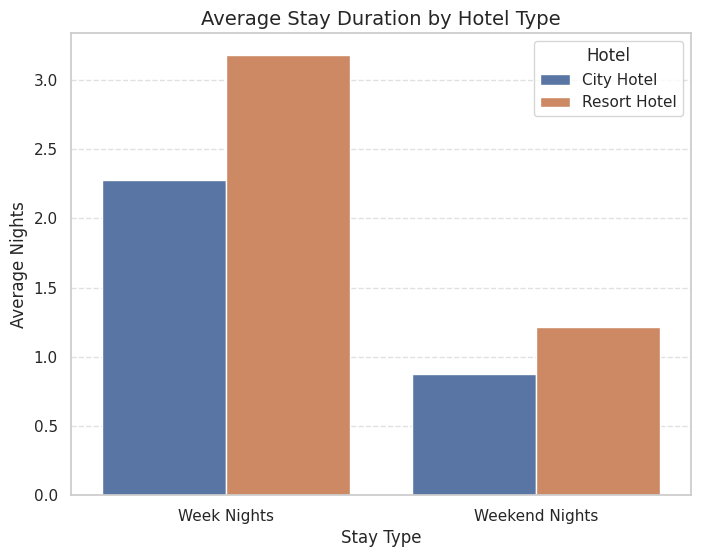

In [ ]:
# Calculate average weeknights and weekend nights per hotel
avg_stay = (
    df.groupby('hotel')[['stays_in_week_nights','stays_in_weekend_nights']]
      .mean()
      .reset_index()
      .melt(id_vars='hotel', var_name='stay_type', value_name='average_nights')
)

# Visualization with barplot
plt.figure(figsize=(8,6))
sns.barplot(x='stay_type', y='average_nights', hue='hotel', data=avg_stay)

plt.title('Average Stay Duration by Hotel Type', fontsize=14)
plt.xlabel('Stay Type', fontsize=12)
plt.ylabel('Average Nights', fontsize=12)
plt.xticks(
    ticks=[0,1],
    labels=['Week Nights','Weekend Nights']
)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Hotel')
plt.show()


/tmp/ipython-input-2825114373.py:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/tmp/ipython-input-2825114373.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




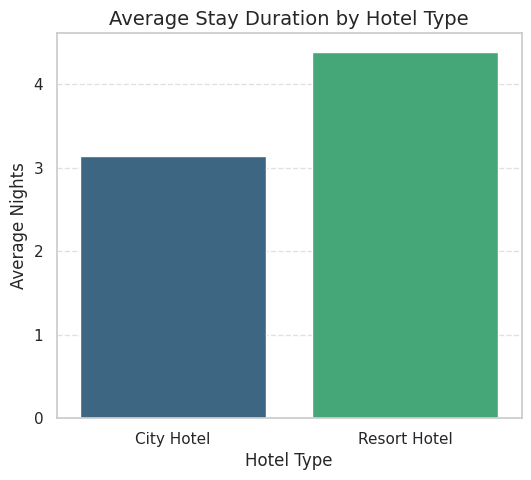

In [ ]:
# Calculate average stay duration without creating a new column in df
avg_stay_duration = (
    df.groupby('hotel')
      .apply(lambda g: (g['stays_in_week_nights'] + g['stays_in_weekend_nights']).mean())
      .reset_index(name='average_stay_duration')
)

# Bar plot
plt.figure(figsize=(6,5))
sns.barplot(x='hotel', y='average_stay_duration', data=avg_stay_duration, palette='viridis')

plt.title('Average Stay Duration by Hotel Type', fontsize=14)
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Average Nights', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [ ]:
# Calculate average guest composition per hotel
guest_composition = (
    df.groupby('hotel')[['adults', 'children', 'babies']]
      .mean()
      .reset_index()
      .melt(id_vars='hotel', var_name='guest_type', value_name='average_count')
)

print(guest_composition.head())


          hotel guest_type  average_count
0    City Hotel     adults       1.876352
1  Resort Hotel     adults       1.875040
2    City Hotel   children       0.131846
3  Resort Hotel   children       0.149339
4    City Hotel     babies       0.007337


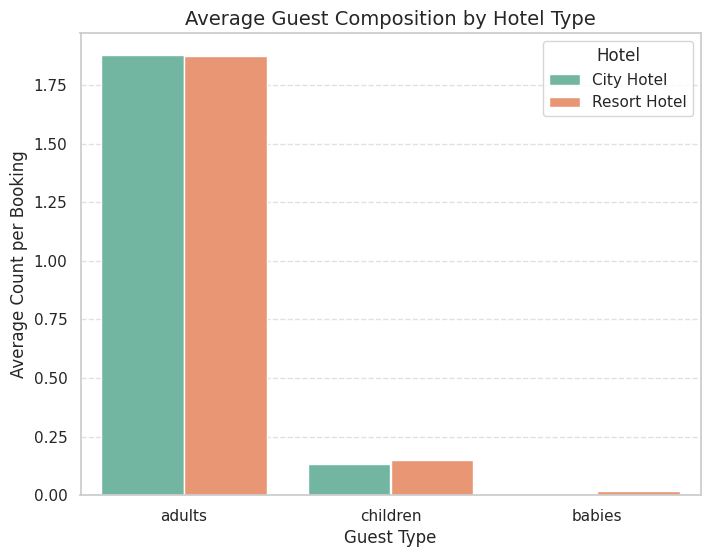

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='guest_type', y='average_count', hue='hotel', data=guest_composition, palette='Set2')

plt.title('Average Guest Composition by Hotel Type', fontsize=14)
plt.xlabel('Guest Type', fontsize=12)
plt.ylabel('Average Count per Booking', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Hotel')
plt.show()


## Customer Info
**Columns:** `meal`, `country`, `market_segment`, `distribution_channel`,
`is_repeated_guest`, `previous_cancellations`, `previous_bookings_not_canceled`,
`customer_type`, `agent`, `company`

- **Tujuan Analisis:**
  - Mengetahui asal negara tamu (top 10 countries).
  - Distribusi market segment dan channel distribusi.
  - Identifikasi perbedaan antara tamu baru dan repeat guest.
  - Mengukur pengaruh previous cancellations terhadap kemungkinan cancel lagi.


In [ ]:
import pycountry
import plotly.express as px
  # for ISO to full country names

# Function to convert ISO alpha-3 to full country name
def iso_to_country(alpha3):
    try:
        return pycountry.countries.get(alpha_3=alpha3).name
    except:
        return alpha3

# Filter non-canceled bookings
country_visitors = df[df['is_canceled'] == 0].groupby('country').size().reset_index(name='count')

# Map ISO codes to full country names
country_visitors['country_full'] = country_visitors['country'].apply(iso_to_country)

# Sort to get top 10
top10_countries = country_visitors.sort_values(by='count', ascending=False).head(10)
print("Top 10 Countries by Bookings (Full Names):\n")
print(top10_countries[['country_full','count']])

# Choropleth map with red color scale
fig = px.choropleth(country_visitors,
                    locations='country',          # ISO codes
                    color='count',
                    hover_name='country_full',    # show full name on hover
                    color_continuous_scale='Reds', # red color scheme
                    title='Home Country of Visitors (Non-Canceled Bookings)')

fig.show()


Top 10 Countries by Bookings (Full Names):

       country_full  count
125        Portugal  17658
57   United Kingdom   8447
54           France   7104
50            Spain   5390
42          Germany   4334
70          Ireland   2348
75            Italy   1991
15          Belgium   1670
113     Netherlands   1561
158   United States   1416


market_segment
Online TA        59.063498
Offline TA/TO    15.893305
Direct           13.507421
Groups            5.655174
Corporate         4.815251
Complementary     0.803305
Aviation          0.259758
Undefined         0.002289
Name: proportion, dtype: float64


/tmp/ipython-input-599991039.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




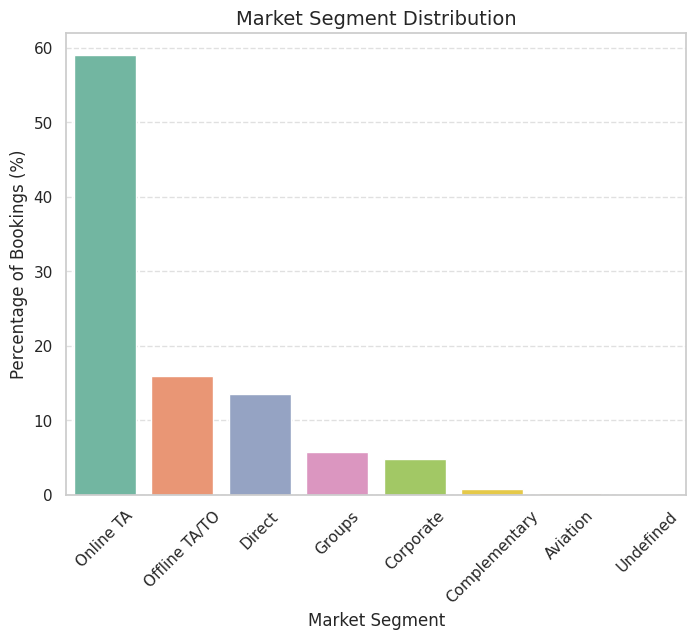

distribution_channel
TA/TO        79.115220
Direct       14.862282
Corporate     5.809656
GDS           0.207120
Undefined     0.005722
Name: proportion, dtype: float64


/tmp/ipython-input-599991039.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




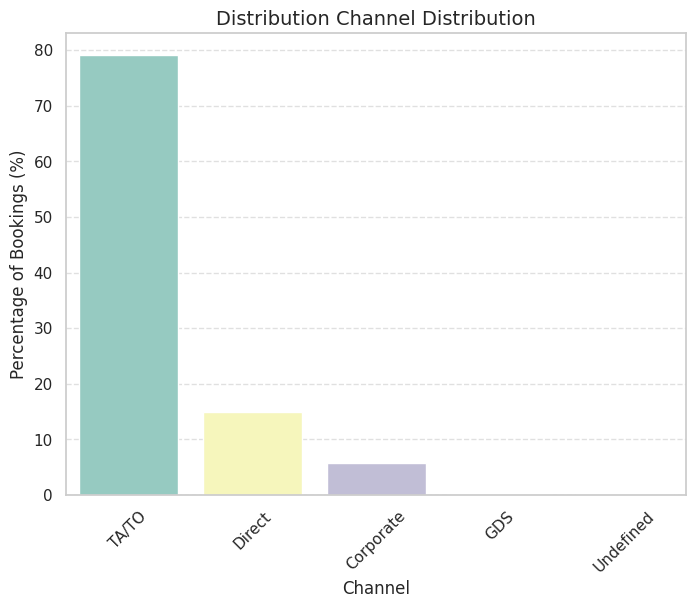

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count bookings per market segment and normalize
market_counts = (
    df['market_segment']
      .value_counts(normalize=True) * 100   # percentage
)

print(market_counts)

# Visualization
plt.figure(figsize=(8,6))
sns.barplot(x=market_counts.index, y=market_counts.values, palette="Set2")
plt.title('Market Segment Distribution', fontsize=14)
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Percentage of Bookings (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()






# Count bookings per channel and normalize
channel_counts = (
    df['distribution_channel']
      .value_counts(normalize=True) * 100
)

print(channel_counts)

# Visualization
plt.figure(figsize=(8,6))
sns.barplot(x=channel_counts.index, y=channel_counts.values, palette="Set3")
plt.title('Distribution Channel Distribution', fontsize=14)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Percentage of Bookings (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


   previous_cancellations  bookings  cancel_rate  cancel_count
0                       0     85704     0.266977         22881
1                       1      1407     0.761194          1071
2                       2       112     0.303571            34
3                       3        61     0.262295            16
4                       4        30     0.200000             6
5                       5        19     0.105263             2
6                       6        17     0.117647             2
7                      11        27     0.074074             2
8                      13         4     0.750000             3
9                      14         1     1.000000             1
  prevc_bucket  bookings  cancel_rate  cancel_count
0            0     85704     0.266977         22881
1            1      1407     0.761194          1071
2          2–3       173     0.289017            50
3           4+       105     0.219048            23
Spearman correlation (previous_cancellations vs

/tmp/ipython-input-3256674715.py:23: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



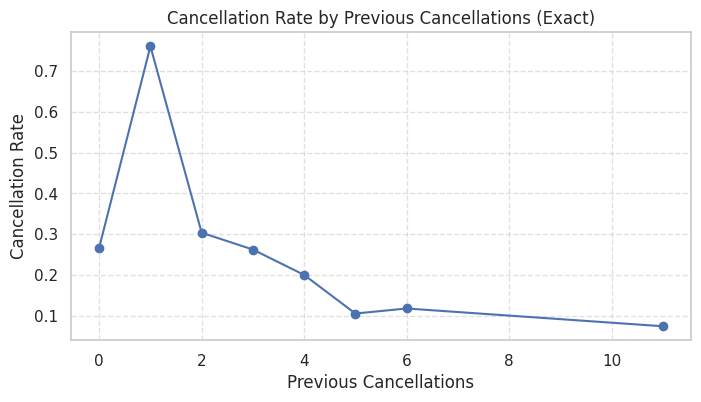

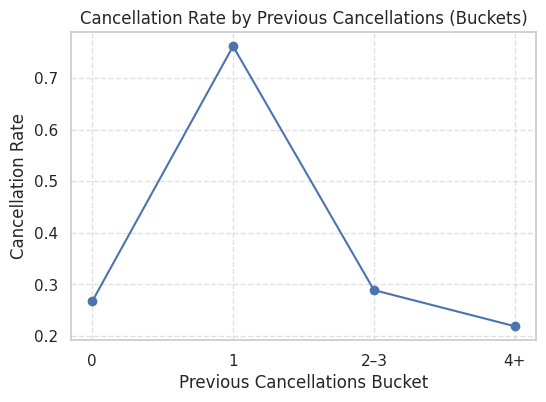

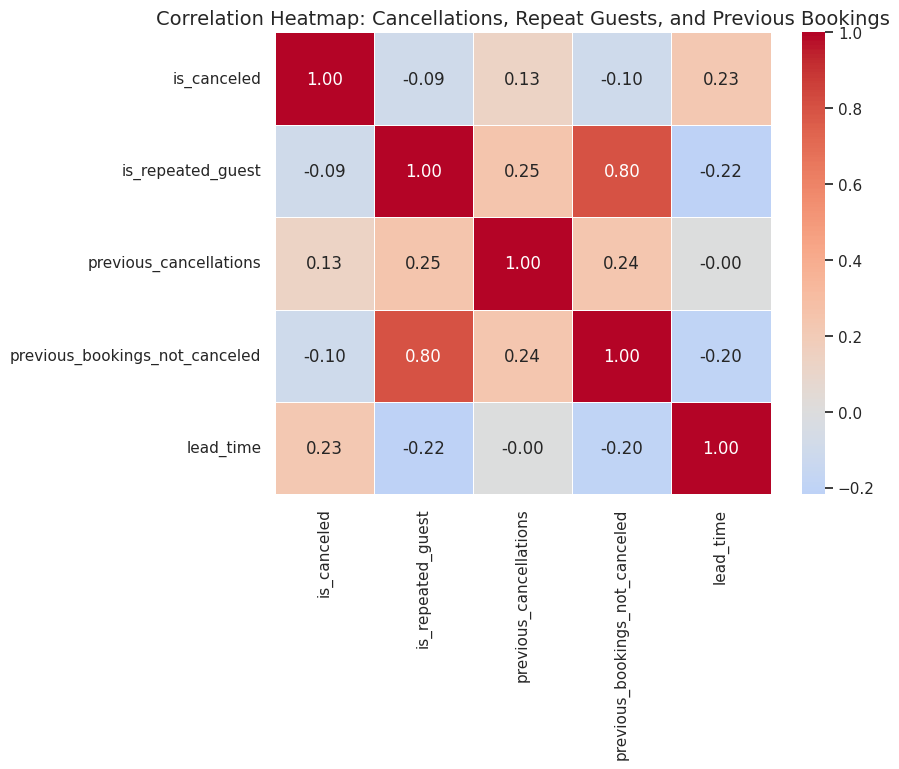

In [ ]:
import pandas as pd
import numpy as np

# 2) PENGARUH previous_cancellations TERHADAP is_canceled

# a) Cancellation rate per exact count of previous_cancellations
prevc_exact = (
    df.groupby('previous_cancellations')['is_canceled']
      .agg(bookings='size', cancel_rate='mean', cancel_count='sum')
      .reset_index()
      .sort_values('previous_cancellations')
)
print(prevc_exact.head(10))  # lihat sebagian awal

# b) Cancellation rate per bucket (0, 1, 2-3, 4+)
bins = [-1, 0, 1, 3, np.inf]
labels = ['0', '1', '2–3', '4+']

prevc_bucket = (
    df.assign(
        prevc_bucket=pd.cut(df['previous_cancellations'], bins=bins, labels=labels)
    )
    .groupby('prevc_bucket')['is_canceled']
    .agg(bookings='size', cancel_rate='mean', cancel_count='sum')
    .reset_index()
    .sort_values('prevc_bucket')
)
print(prevc_bucket)

# c) Korelasi monotonic (Spearman) antara previous_cancellations dan is_canceled
#    (nilai positif → makin banyak riwayat cancel, makin tinggi peluang cancel lagi)
spearman_corr = df[['previous_cancellations','is_canceled']].corr(method='spearman').iloc[0,1]
print("Spearman correlation (previous_cancellations vs is_canceled):", spearman_corr)


import matplotlib.pyplot as plt

# Bar: cancellation rate by exact previous_cancellations (top 8 nilai teratas agar tidak terlalu panjang)
top_exact = prevc_exact.head(8)

plt.figure(figsize=(8,4))
plt.plot(top_exact['previous_cancellations'], top_exact['cancel_rate'], marker='o')
plt.title('Cancellation Rate by Previous Cancellations (Exact)')
plt.xlabel('Previous Cancellations')
plt.ylabel('Cancellation Rate')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Bar: cancellation rate by bucket
plt.figure(figsize=(6,4))
plt.plot(prevc_bucket['prevc_bucket'].astype(str), prevc_bucket['cancel_rate'], marker='o')
plt.title('Cancellation Rate by Previous Cancellations (Buckets)')
plt.xlabel('Previous Cancellations Bucket')
plt.ylabel('Cancellation Rate')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Pilih variabel yang relevan untuk heatmap
corr_vars = df[['is_canceled',
                'is_repeated_guest',
                'previous_cancellations',
                'previous_bookings_not_canceled',
                'lead_time']]

# Hitung korelasi
corr_matrix = corr_vars.corr(method='spearman')  # pakai Spearman untuk variabel ordinal/biner

# Visualisasi heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            linewidths=0.5,
            fmt=".2f")

plt.title('Correlation Heatmap: Cancellations, Repeat Guests, and Previous Bookings', fontsize=14)
plt.show()


In [ ]:
# 1) NEW vs REPEAT GUEST — ringkasan & cancellation rate
new_vs_repeat = (
    df.groupby('is_repeated_guest')
      .agg(
          bookings=('is_canceled', 'size'),
          cancel_count=('is_canceled', 'sum'),
          cancel_rate=('is_canceled', 'mean'),
          avg_lead_time=('lead_time', 'mean'),
          avg_week_nights=('stays_in_week_nights', 'mean'),
          avg_weekend_nights=('stays_in_weekend_nights', 'mean')
      )
      .reset_index()
      .replace({'is_repeated_guest': {0: 'New Guest', 1: 'Repeat Guest'}})
)

print(new_vs_repeat)

  is_repeated_guest  bookings  cancel_count  cancel_rate  avg_lead_time  avg_week_nights  avg_weekend_nights
0         New Guest     83974         23764     0.282992      82.448532         2.672577             1.02758
1      Repeat Guest      3415           261     0.076428      17.160469         1.469107             0.45798


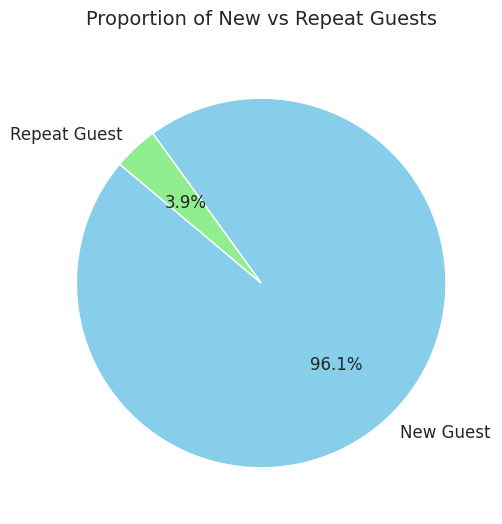

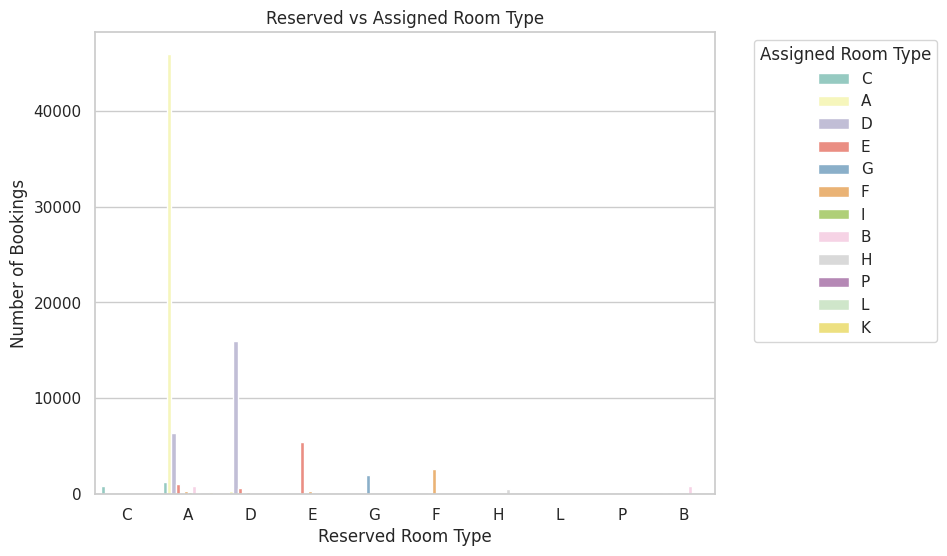

In [ ]:
import matplotlib.pyplot as plt

# Hitung distribusi tamu
guest_counts = df['is_repeated_guest'].value_counts().rename({0: 'New Guest', 1: 'Repeat Guest'})

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    guest_counts,
    labels=guest_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['skyblue','lightgreen'],
    textprops={'fontsize': 12}
)

plt.title('Proportion of New vs Repeat Guests', fontsize=14, pad=20)
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x='reserved_room_type', hue='assigned_room_type', data=df, palette="Set3")
plt.title('Reserved vs Assigned Room Type')
plt.xlabel('Reserved Room Type')
plt.ylabel('Number of Bookings')
plt.legend(title='Assigned Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



#Revenue Analysis

## Operational & Financial
**Columns:** `reserved_room_type`, `assigned_room_type`, `booking_changes`,
`deposit_type`, `days_in_waiting_list`, `adr`,
`required_car_parking_spaces`, `total_of_special_requests`

- **Purpose of Analysis:**
  - Compare ADR (Average Daily Rate) across hotels.
  - Assess differences between reserved and assigned room types.
  - Analyze deposit types and their relation to cancellations.
  - Examine the number of special requests and booking changes.


/tmp/ipython-input-1845982737.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipython-input-1845982737.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




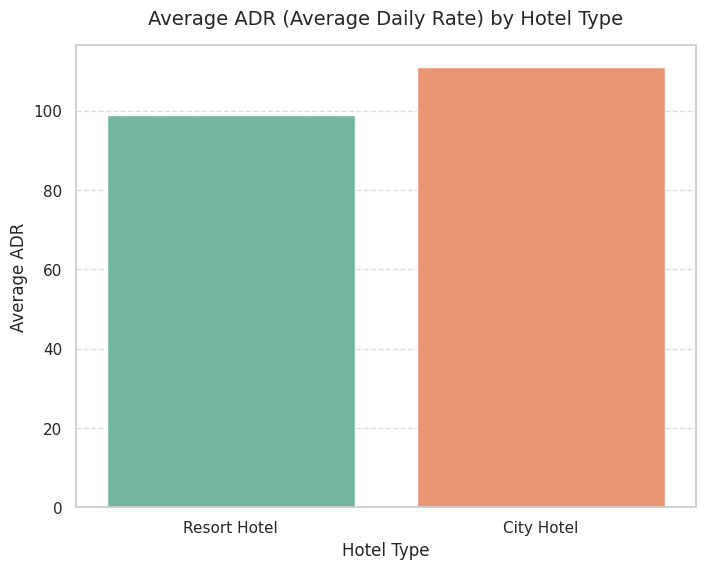

          hotel         adr
0    City Hotel  110.985270
1  Resort Hotel   99.030296
Average ADR (City + Resort combined): 106.34


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.barplot(
    x='hotel',
    y='adr',
    data=df,
    palette="Set2",
    ci=None   # hilangkan confidence interval supaya lebih clean
)

plt.title('Average ADR (Average Daily Rate) by Hotel Type', fontsize=14, pad=15)
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Average ADR', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



# Hitung rata-rata ADR per hotel
avg_adr = df.groupby('hotel')['adr'].mean().reset_index()

print(avg_adr)

# Average ADR semua hotel digabung
avg_adr_all = df['adr'].mean()

print("Average ADR (City + Resort combined):", round(avg_adr_all, 2))


In [ ]:
# Calculate total revenue for each booking
df['total_revenue'] = df['adr'] * (df['stays_in_week_nights'] + df['stays_in_weekend_nights'])

# Calculate total revenue per hotel
total_revenue_by_hotel = df.groupby('hotel')['total_revenue'].sum().reset_index()

# Calculate total combined revenue (City + Resort)
total_revenue_all = df['total_revenue'].sum()

print(total_revenue_by_hotel)
print("Total Revenue (City + Resort):", round(total_revenue_all, 2))



          hotel  total_revenue
0    City Hotel    18773843.54
1  Resort Hotel    15686510.77
Total Revenue (City + Resort): 34460354.31


Q1 (Low Spender): -63.8 – 197.88
Q2 (Medium Spender): 197.89 – 410.02
Q3 (High Spender): 410.03 – 7590.0


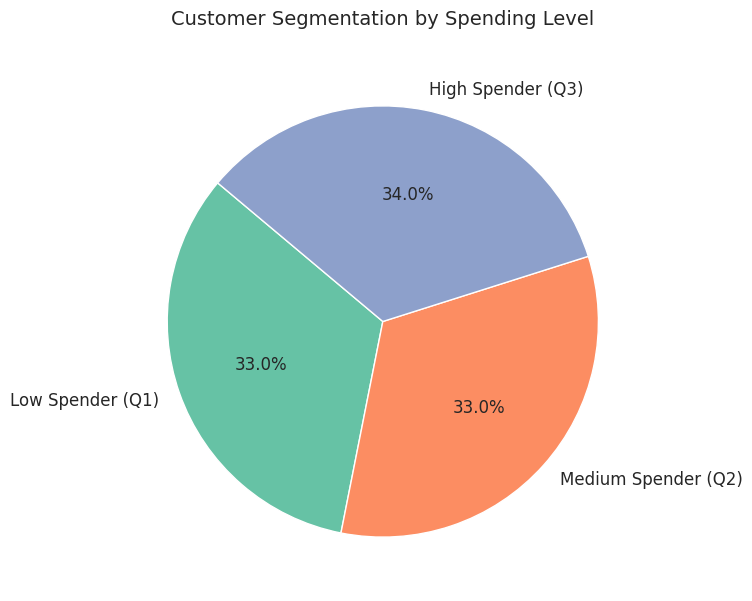

Q1 (Low Spender max): 197.88
Q2 (Medium Spender max): 410.02
Q3 (High Spender min): 410.03


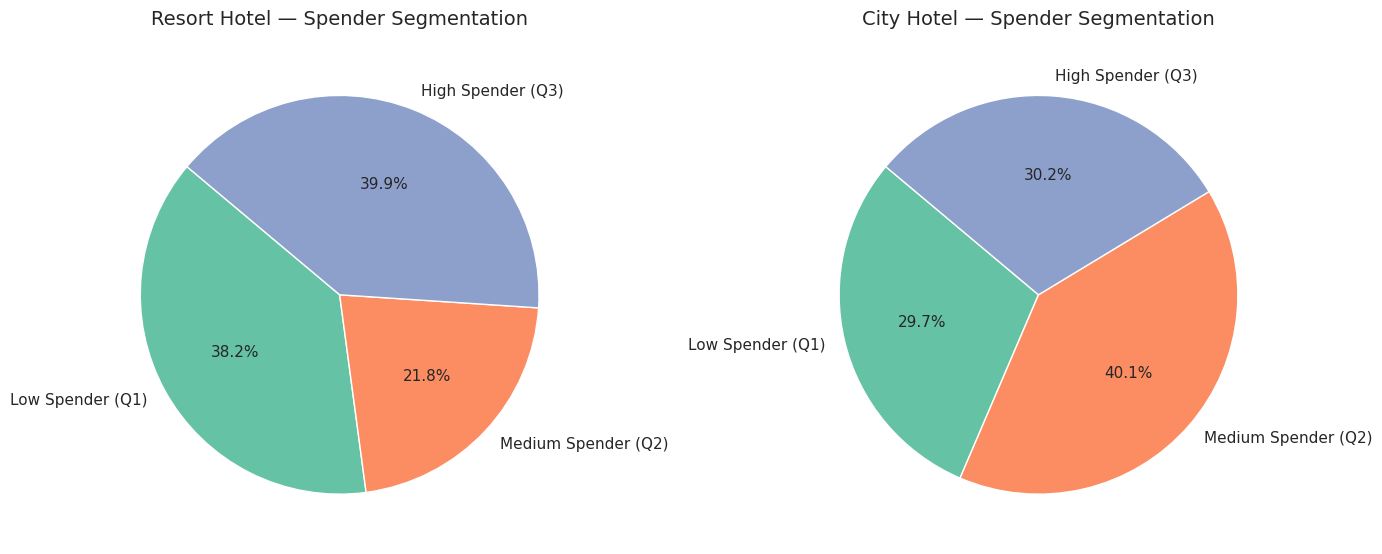

In [ ]:


df['total_revenue'] = df['adr'] * (df['stays_in_week_nights'] + df['stays_in_weekend_nights'])
# Hitung quantiles
# Hitung quantiles
q1 = df['total_revenue'].quantile(0.33)
q2 = df['total_revenue'].quantile(0.66)
min_rev = df['total_revenue'].min()
max_rev = df['total_revenue'].max()

print("Q1 (Low Spender):", f"{round(min_rev,2)} – {round(q1,2)}")
print("Q2 (Medium Spender):", f"{round(q1+0.01,2)} – {round(q2,2)}")
print("Q3 (High Spender):", f"{round(q2+0.01,2)} – {round(max_rev,2)}")

import matplotlib.pyplot as plt

# Hitung jumlah booking per segmen
seg_counts = df['spender_segment'].value_counts().reindex(
    ['Low Spender (Q1)', 'Medium Spender (Q2)', 'High Spender (Q3)']
)

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(
    seg_counts,
    labels=seg_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66c2a5','#fc8d62','#8da0cb'],  # custom color palette
    textprops={'fontsize': 12}
)

plt.title("Customer Segmentation by Spending Level", fontsize=14, pad=20)
plt.show()


# Hitung quantiles
q1 = df['total_revenue'].quantile(0.33)
q2 = df['total_revenue'].quantile(0.66)

print("Q1 (Low Spender max):", round(q1,2))
print("Q2 (Medium Spender max):", round(q2,2))
print("Q3 (High Spender min):", round(q2,2)+0.01)

import matplotlib.pyplot as plt

# Hitung distribusi spender per hotel
seg_counts_by_hotel = (
    df.groupby(['hotel','spender_segment'])
      .size()
      .reset_index(name='count')
)

# Urutkan segmen biar konsisten
order = ['Low Spender (Q1)', 'Medium Spender (Q2)', 'High Spender (Q3)']

# Buat 2 subplot untuk City dan Resort
fig, axes = plt.subplots(1, 2, figsize=(14,7))

hotels = df['hotel'].unique()

for ax, h in zip(axes, hotels):
    data = seg_counts_by_hotel[seg_counts_by_hotel['hotel'] == h]
    data = data.set_index('spender_segment').reindex(order).fillna(0)

    wedges, texts, autotexts = ax.pie(
        data['count'],
        labels=data.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=['#66c2a5','#fc8d62','#8da0cb'],
        textprops={'fontsize': 11}
    )
    ax.set_title(f"{h} — Spender Segmentation", fontsize=14, pad=15)

plt.tight_layout()
plt.show()


Cancelatioon Rate

/tmp/ipython-input-2065335373.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




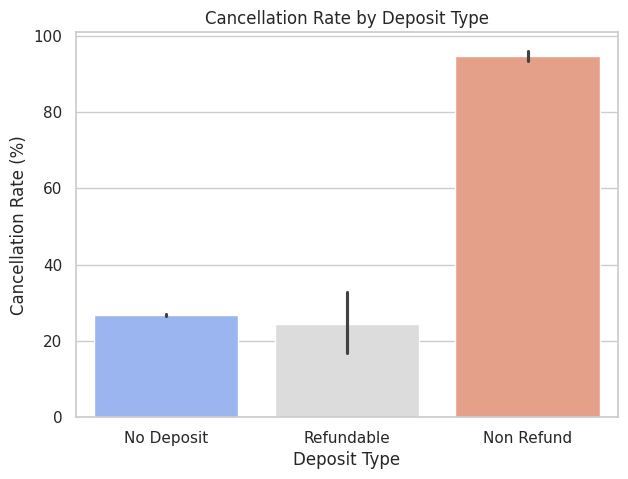

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x='deposit_type', y='is_canceled', data=df, palette="coolwarm", estimator=lambda x: 100*sum(x)/len(x))
plt.title('Cancellation Rate by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Cancellation Rate (%)')
plt.show()

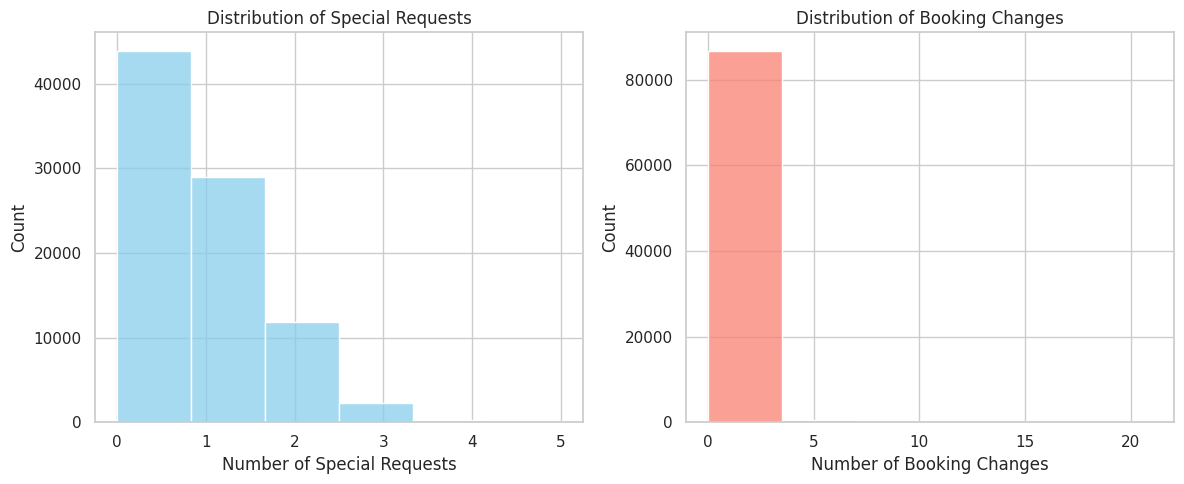

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df['total_of_special_requests'], bins=6, kde=False, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Special Requests')
axes[0].set_xlabel('Number of Special Requests')
axes[0].set_ylabel('Count')

sns.histplot(df['booking_changes'], bins=6, kde=False, color='salmon', ax=axes[1])
axes[1].set_title('Distribution of Booking Changes')
axes[1].set_xlabel('Number of Booking Changes')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


## Outcome
**Columns:** `reservation_status`, `reservation_status_date`

- **Purpose of Analysis:**
  - Measure the proportion of reservation outcomes: Canceled, Check-Out, No-Show.
  - Analyze cancellation trends by status date.
  - Compare outcome patterns between City Hotel and Resort Hotel.

  reservation_status  percentage
0          Check-Out   72.507982
1           Canceled   26.331689
2            No-Show    1.160329


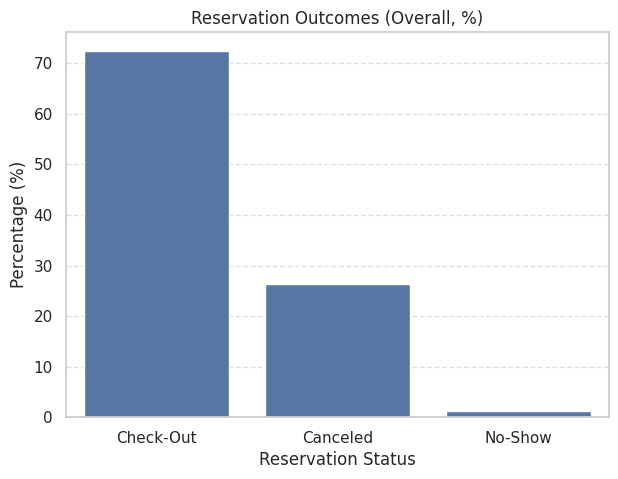

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Proportions (%)
outcome_props = (
    df['reservation_status']
      .value_counts(normalize=True)
      .mul(100)
      .rename_axis('reservation_status')
      .reset_index(name='percentage')
)

print(outcome_props)

# Visualize
plt.figure(figsize=(7,5))
sns.barplot(x='reservation_status', y='percentage', data=outcome_props)
plt.title('Reservation Outcomes (Overall, %)')
plt.xlabel('Reservation Status')
plt.ylabel('Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


/tmp/ipython-input-45754981.py:8: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



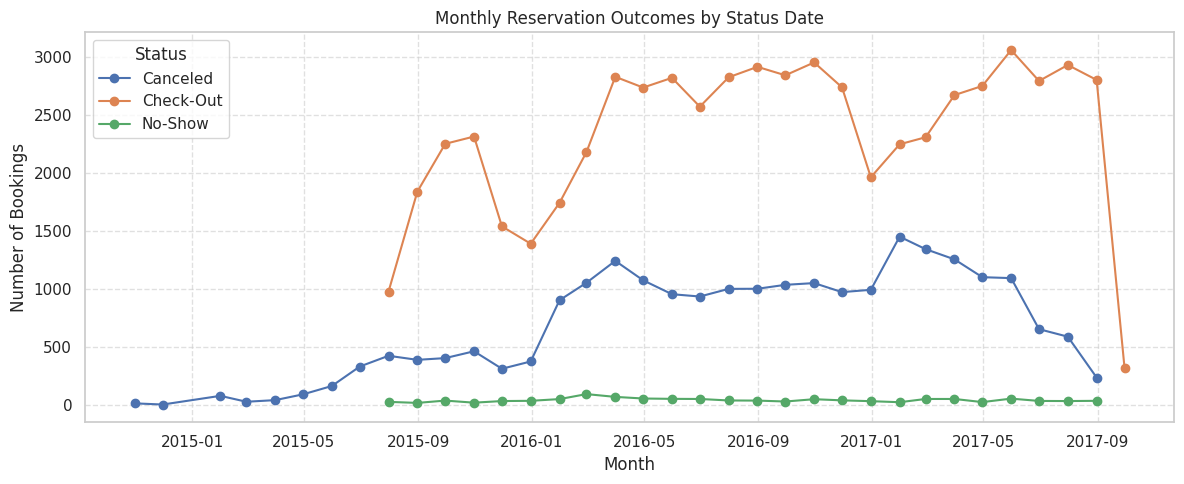

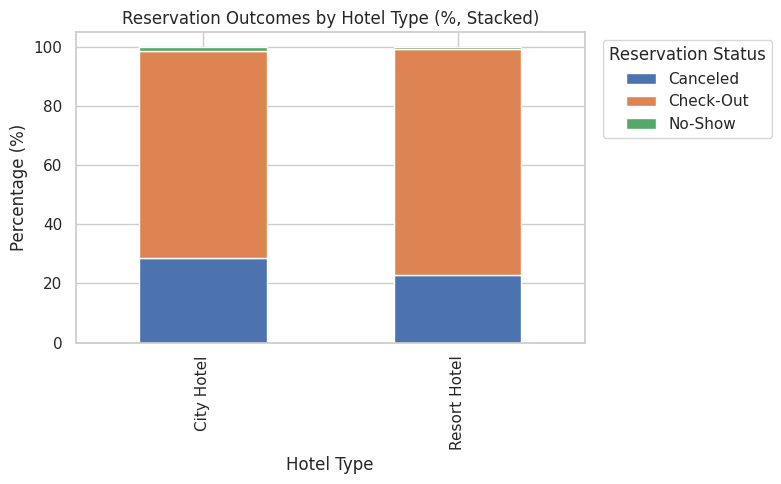

In [ ]:
# Ensure datetime for status date
status_date = pd.to_datetime(df['reservation_status_date'], errors='coerce')

# Count per status by month
trend = (
    df.assign(_status_date=status_date)
      .dropna(subset=['_status_date'])
      .groupby([pd.Grouper(key='_status_date', freq='M'), 'reservation_status'])
      .size()
      .rename('count')
      .reset_index()
      .sort_values('_status_date')
)

# Line plot per status
plt.figure(figsize=(12,5))
for status in trend['reservation_status'].unique():
    t = trend[trend['reservation_status'] == status]
    plt.plot(t['_status_date'], t['count'], marker='o', linestyle='-', label=status)

plt.title('Monthly Reservation Outcomes by Status Date')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.legend(title='Status')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Percentage distribution per hotel
hotel_outcomes = (
    df.groupby(['hotel', 'reservation_status'])
      .size()
      .rename('count')
      .reset_index()
)

hotel_totals = hotel_outcomes.groupby('hotel')['count'].transform('sum')
hotel_outcomes['percentage'] = hotel_outcomes['count'] / hotel_totals * 100

# Pivot for stacked bar
pivot_perc = hotel_outcomes.pivot(index='hotel', columns='reservation_status', values='percentage').fillna(0)
pivot_perc = pivot_perc[pivot_perc.columns.sort_values()]  # optional: sort columns alphabetically

# Stacked percentage bar
pivot_perc.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Reservation Outcomes by Hotel Type (%, Stacked)')
plt.xlabel('Hotel Type')
plt.ylabel('Percentage (%)')
plt.legend(title='Reservation Status', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Segmentation Analysis

spender_segment                  High Spender (Q3)  Low Spender (Q1)  Medium Spender (Q2)
customer_segment                                                                         
Children Only                                22.22             31.48                46.30
Couple                                       33.61             29.11                37.27
Family with Babies                           45.13             24.97                29.90
Family with Children                         60.05             14.50                25.45
Family with Children and Babies              59.52             22.02                18.45
Group of Adults                              62.97             11.94                25.09
Others                                        0.00             33.33                66.67
Single Parent                                46.90             17.70                35.40
Solo Traveler                                12.58             62.92                24.50
Unknown / 

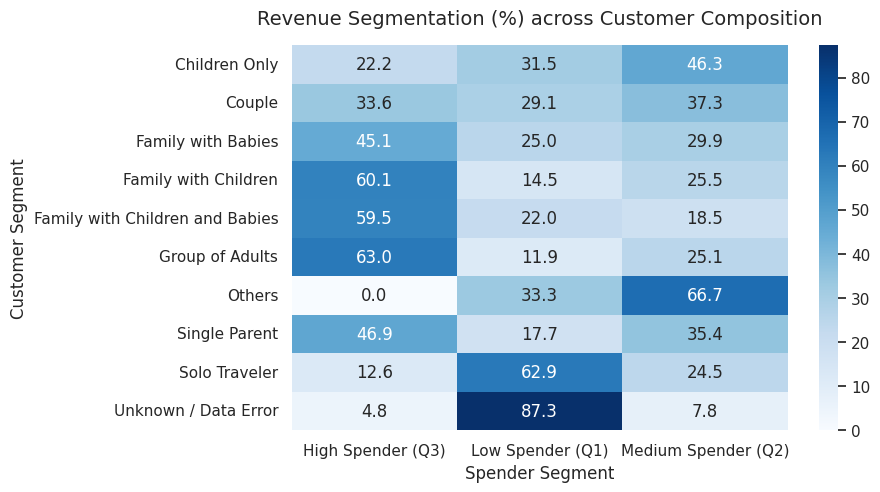

In [ ]:
import pandas as pd

# Crosstab antara composition segment dan revenue segment
cross_tab = pd.crosstab(df['customer_segment'], df['spender_segment'], normalize='index') * 100
print(cross_tab.round(2))

from sklearn.preprocessing import LabelEncoder

le_rev = LabelEncoder()
le_comp = LabelEncoder()

df['spender_segment_code'] = le_rev.fit_transform(df['spender_segment'])
df['customer_segment_code'] = le_comp.fit_transform(df['customer_segment'])

# Hitung korelasi Spearman (lebih cocok untuk ordinal/categorical)
corr = df[['spender_segment_code','customer_segment_code']].corr(method='spearman').iloc[0,1]
print("Spearman correlation between Revenue Segmentation and Customer Composition:", round(corr,3))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.heatmap(cross_tab, annot=True, cmap="Blues", fmt=".1f")
plt.title("Revenue Segmentation (%) across Customer Composition", fontsize=14, pad=15)
plt.xlabel("Spender Segment")
plt.ylabel("Customer Segment")
plt.show()


Meal vs Spender (%)
spender_segment  High Spender (Q3)  Low Spender (Q1)  Medium Spender (Q2)
meal                                                                     
BB                           32.16             34.63                33.21
FB                           61.94             19.44                18.61
HB                           62.53             16.42                21.05
SC                           17.96             37.96                44.08
Undefined                    49.80             28.86                21.34

Deposit Type vs Spender (%)
spender_segment  High Spender (Q3)  Low Spender (Q1)  Medium Spender (Q2)
deposit_type                                                             
No Deposit                   34.29             32.82                 32.9
Non Refund                   11.75             48.65                 39.6
Refundable                   19.63             28.97                 51.4

Average values per Spender Segment
                     stay_d

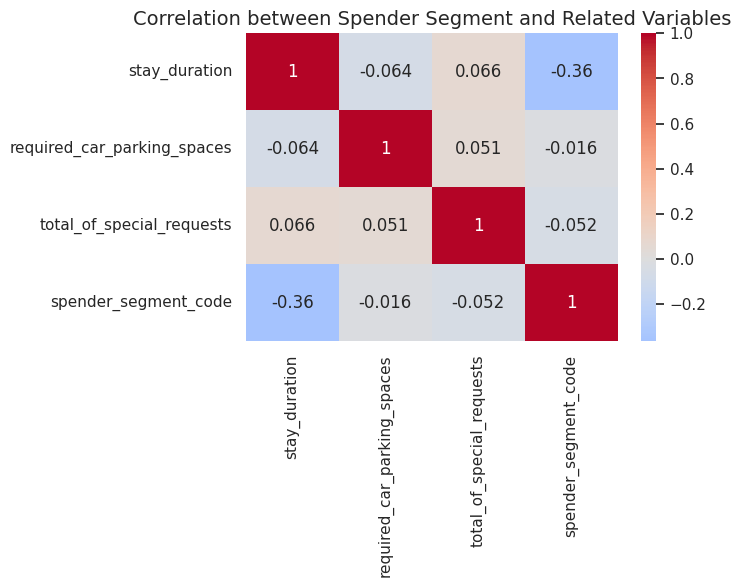

In [ ]:
df['stay_duration'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

# Meal vs spender
meal_vs_spender = pd.crosstab(df['meal'], df['spender_segment'], normalize='index') * 100
print("Meal vs Spender (%)")
print(meal_vs_spender.round(2))

# Deposit type vs spender
deposit_vs_spender = pd.crosstab(df['deposit_type'], df['spender_segment'], normalize='index') * 100
print("\nDeposit Type vs Spender (%)")
print(deposit_vs_spender.round(2))

avg_vars = df.groupby('spender_segment')[['stay_duration','required_car_parking_spaces','total_of_special_requests']].mean()
print("\nAverage values per Spender Segment")
print(avg_vars.round(2))
from sklearn.preprocessing import LabelEncoder

# Encode spender_segment jadi angka
le = LabelEncoder()
df['spender_segment_code'] = le.fit_transform(df['spender_segment'])  # Low=0, Medium=1, High=2

# Pilih variabel numerik
num_vars = ['stay_duration','required_car_parking_spaces','total_of_special_requests']
corr_matrix = df[num_vars + ['spender_segment_code']].corr(method='spearman')

print("\nCorrelation Matrix (Spearman)")
print(corr_matrix['spender_segment_code'].round(3))


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation between Spender Segment and Related Variables", fontsize=14)
plt.show()

